In [1]:
!pip install tensorflow

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [11]:
df= pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [18]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [19]:
x = df.drop(columns=['Id', 'Species'])
y = df['Species']
x.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [22]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=69)

In [25]:
x_train.shape

(105, 4)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit.transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0


AttributeError: 'function' object has no attribute 'transform'

In [30]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [34]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

C:\Users\Prashant\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 9s - 2s/step - accuracy: 0.3143 - loss: 1.4354
Epoch 2/100
4/4 - 1s - 185ms/step - accuracy: 0.3333 - loss: 1.3949
Epoch 3/100
4/4 - 0s - 18ms/step - accuracy: 0.3429 - loss: 1.2504
Epoch 4/100
4/4 - 0s - 13ms/step - accuracy: 0.3714 - loss: 1.1646
Epoch 5/100
4/4 - 0s - 18ms/step - accuracy: 0.3714 - loss: 1.1137
Epoch 6/100
4/4 - 0s - 15ms/step - accuracy: 0.3905 - loss: 1.0598
Epoch 7/100
4/4 - 0s - 14ms/step - accuracy: 0.5048 - loss: 0.9342
Epoch 8/100
4/4 - 0s - 27ms/step - accuracy: 0.5048 - loss: 0.8989
Epoch 9/100
4/4 - 0s - 16ms/step - accuracy: 0.5333 - loss: 0.8870
Epoch 10/100
4/4 - 0s - 13ms/step - accuracy: 0.5714 - loss: 0.8525
Epoch 11/100
4/4 - 0s - 14ms/step - accuracy: 0.6190 - loss: 0.8137
Epoch 12/100
4/4 - 0s - 17ms/step - accuracy: 0.6476 - loss: 0.7755
Epoch 13/100
4/4 - 0s - 14ms/step - accuracy: 0.6381 - loss: 0.7614
Epoch 14/100
4/4 - 0s - 14ms/step - accuracy: 0.6667 - loss: 0.7262
Epoch 15/100
4/4 - 0s - 14ms/step - accuracy: 0.6476 - los

In [39]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[9.9811792e-01 1.8735122e-03 8.5978691e-06]
 [6.3642594e-03 9.1755271e-01 7.6083101e-02]
 [9.9686348e-01 3.1229616e-03 1.3528609e-05]
 [1.1126022e-04 5.4815616e-02 9.4507313e-01]
 [9.9557388e-01 4.4040089e-03 2.2116446e-05]]


In [40]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [41]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int32


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [43]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

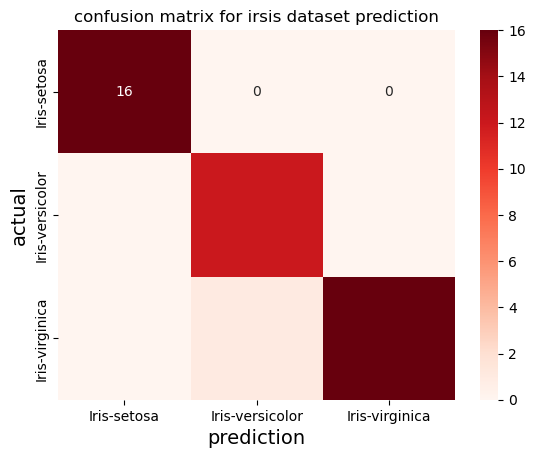

In [46]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)